 <font size= "7"> <div align= "center">
  CS 455: Course Project
</div></font>
 <font size= "6"> <div align= "center">
  Whale and Dolphin Species Identification
</div></font>
 <font size= "5"> <div align= "center">
  Developed by: Elijah Keck & Dillon Mead
</div></font>
 <font size= "5"> <div align= "center">
  29 April 2022
</div></font> 

 <font size= "4"> <div align= "left">
  This program is designed to evaluate the classification of a kaggle competition data set Happy Whale - Whale and Dolphin Identification. The data set includes images of wild whales and dolphins. The data set also includes a .csv file associating each image name with the image's depicted whale or dolphin species and the individual's identification number.
</div></font>

In [1]:
# all module imports for program
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

 <font size= "4"> <div align= "left">
  Working directory for data set. Must change when executing on new system. Must also end with data set folder.
</div></font>

In [2]:
work_dir = "Q:/Dillon/Documents/School/CS_455/Project/CS455_Project/happy-whale-and-dolphin/"

 <font size= "4"> <div align= "left">
  Labels are contained separately from data set. Labels file is read as data frame.
</div></font>

In [3]:
train_df = pd.read_csv(work_dir+ 'train.csv', usecols=['image', 'species', 'individual_id'])

### Load and Split Function.
 <font size= "4"> <div align= "left">
  This function is used to load the data set images from a directory and return a training set, test set, and associated labels.
</div></font>
 <font size= "4"> <div align= "left">
  The data is also pre-processed as it is loaded. The images become black & white if the user chooses grayscale, The images are resized to a standard chosen squared resolution, and the image is converted to a numpy array and resized again into a 1D vector.
</div></font>
 <font size= "4"> <div align= "left">
  Finally, every returned item is converted into a numpy array to allow use in the ML models.
</div></font>

In [4]:

# @Param: 1) max_photo - Number of images to load from dataset. 2) w - width of image in pixels.
#         3) split - percentage of data set split into train; remainder split into test. 4) gray - color or grayscale.
# @return: 6 variables total. 1) Training dataset. 2) Species train labels. 3) Individuals train labels.
#                             4) Test dataset. 5) Species test labels. 6) Individuals test labels.

def load_split_traindata(max_photo, w = 64, split= 0.7, gray = False):
    X_train = []
    X_test = []
    species_train = []
    species_test = []
    individuals_train = []
    individuals_test = []
    count = 0
    image_dir = work_dir+ "train_images"
    #files = glob.glob(image_dir+ "/*.jpg")
    
    for data in train_df.iterrows():
        if count == max_photo:
            break

        f = data[1]['image']
        f = os.path.join(image_dir, f)

        species = data[1]['species']
        individuals = data[1]['individual_id']

        img = Image.open(f)
        if gray == True:
            img = ImageOps.grayscale(img)
        img = img.resize((w,w))
        data = np.array(img)
        data.resize(1, w**2)
        
        if count < max_photo*split:
            print("Train file ", count+1, " loading.")
            X_train.append(data)
            species_train.append(species)
            individuals_train.append(individuals)
        elif count >= max_photo*split:
            print("Test file ", count+1, " loading.")
            X_test.append(data)
            species_test.append(species)
            individuals_test.append(individuals)
        
        count +=1
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    species_train = np.array(species_train)
    species_test = np.array(species_test)
    individuals_train = np.array(individuals_train)
    individuals_test = np.array(individuals_test)
    X_train = np.concatenate(X_train)
    X_test = np.concatenate(X_test)
    return X_train, species_train, individuals_train, X_test, species_test, individuals_test

### The following series of cells load the image set with different parameters that will later be used to compare the impact of different pre-processing.

First set of loaded items. 1000 image, grayscale, 64 pixel, 70/30% split set.

In [5]:
X_train_64, species_train_64, individual_train_64, X_test_64, species_test_64, individual_test_64 = load_split_traindata(1000, gray= True)
print(X_train_64.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

Second set of loaded items. 1000 image, grayscale, 128 pixel, 70/30% split set.

In [6]:
X_train_128, species_train_128, individual_train_128, X_test_128, species_test_128, individual_test_128 = load_split_traindata(1000, w= 128, gray= True)
print(X_train_128.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

Third set of loaded items. 1000 image, color, 128 pixel, 70/30% split set.

In [7]:
X_train_128_color, species_train_128_color, individual_train_128_color, X_test_128_color, species_test_128_color, individual_train_128_color = load_split_traindata(1000, w= 128)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

Fourth set of loaded items. 2000 image, grayscale, 128 pixel, 70/30% split set.

In [8]:
X_train_128_2000, species_train_128_2000, individual_train_128_2000, X_test_128_2000, species_test_128_2000, individual_train_128_2000 = load_split_traindata(2000, w= 128, gray= True)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

Show images to visualize data set. Notice the clarity of 128x128 pixel and relative fuzziness of 64x64 pixels.

Text(0.5, 1.0, 'sei_whale')

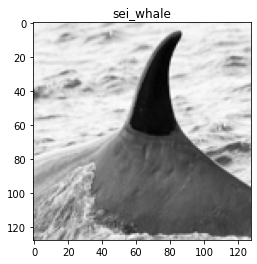

In [9]:
plt.imshow(X_train_128[511].reshape(128, 128), cmap= 'gray')
plt.title(species_train_128[511])

Text(0.5, 1.0, 'sei_whale')

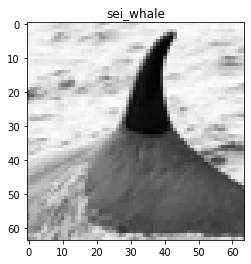

In [10]:
plt.imshow(X_train_64[511].reshape(64, 64), cmap= 'gray')
plt.title(species_train_64[511])

Text(0.5, 1.0, 'humpback_whale')

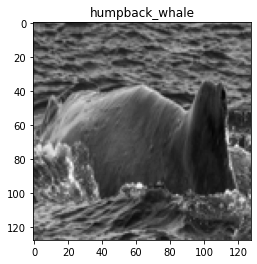

In [11]:
plt.imshow(X_train_128[326].reshape(128, 128), cmap= 'gray')
plt.title(species_train_128[326])

Text(0.5, 1.0, 'false_killer_whale')

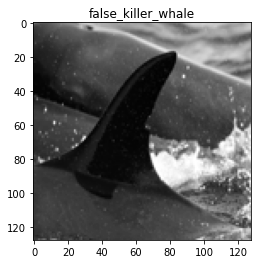

In [12]:
plt.imshow(X_train_128[591].reshape(128, 128), cmap= 'gray')
plt.title(species_train_128[591])

Text(0.5, 1.0, 'false_killer_whale')

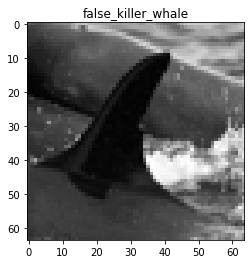

In [13]:
plt.imshow(X_train_64[591].reshape(64, 64), cmap= 'gray')
plt.title(species_train_64[591])

### Model Training and Prediction

The first model used for classification is a Random Forest Classifier. With this model we examine the differences between our preprocessing options and classification set. Most of our models are grayscale and either 64 or 128 pixels and classify species. In this section we also have models that classify individuals in both 64 and 128 pixels, a 128 pixel color model, and a loaded set twice the size as the others. 

In [14]:
rf_1000_64 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_1000_128 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_1000_64.fit(X_train_64, species_train_64)
rf_1000_128.fit(X_train_128, species_train_128)
rf_1000_64.predict(X_test_64)
rf_pred_128 = rf_1000_128.predict(X_test_128)

In [15]:
rf_individual_64 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_individual_128 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_individual_64.fit(X_train_64, individual_train_64)
rf_individual_128.fit(X_train_128, individual_train_128)
rf_individual_64.predict(X_test_64)
rf_indvdl_pred_128 = rf_individual_128.predict(X_test_128)

In [16]:
rf_1000_128_color = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_2000_128 = RandomForestClassifier(n_estimators= 5, random_state= 42)
rf_1000_128_color.fit(X_train_128_color, species_train_128_color)
rf_1000_128_color.predict(X_test_128_color)
rf_2000_128.fit(X_train_128_2000, species_train_128_2000)
rf_2000_128.predict(X_test_128_2000)

array(['beluga', 'bottlenose_dolphin', 'bottlenose_dolphin', 'beluga',
       'humpback_whale', 'blue_whale', 'bottlenose_dolphin', 'beluga',
       'bottlenose_dolpin', 'blue_whale', 'bottlenose_dolphin',
       'bottlenose_dolphin', 'bottlenose_dolphin', 'beluga',
       'dusky_dolphin', 'false_killer_whale', 'beluga', 'humpback_whale',
       'bottlenose_dolphin', 'bottlenose_dolphin', 'dusky_dolphin',
       'humpback_whale', 'humpback_whale', 'bottlenose_dolphin',
       'bottlenose_dolphin', 'beluga', 'humpback_whale',
       'bottlenose_dolphin', 'killer_whale', 'bottlenose_dolpin',
       'blue_whale', 'bottlenose_dolphin', 'killer_whale',
       'false_killer_whale', 'beluga', 'beluga', 'beluga',
       'bottlenose_dolpin', 'dusky_dolphin', 'beluga', 'beluga', 'beluga',
       'blue_whale', 'bottlenose_dolphin', 'humpback_whale',
       'bottlenose_dolphin', 'beluga', 'bottlenose_dolphin', 'gray_whale',
       'dusky_dolphin', 'bottlenose_dolphin', 'bottlenose_dolphin',
      

The next two models, a K-Nearest Neighbors and Support Vector Classifier, are both for comparison with the previous Random Forest Classifier and to use as input to our Voting Classifier. 

In [17]:
knn_1000_64 = KNeighborsClassifier(n_neighbors= 15)
knn_1000_128 = KNeighborsClassifier(n_neighbors= 15)
knn_1000_64.fit(X_train_64, species_train_64)
knn_1000_128.fit(X_train_128, species_train_128)
knn_1000_64.predict(X_test_64)
knn_pred_128 = knn_1000_128.predict(X_test_128)

In [18]:
svc_1000_64 = SVC(degree= 3, probability= True)
svc_1000_128 = SVC(degree= 3, probability= True)
svc_1000_64.fit(X_train_64, species_train_64)
svc_1000_128.fit(X_train_128, species_train_128)
print("Both models fit")
svc_1000_64.predict(X_test_64)
print("SVC 64 predicted")
svc_pred_128 = svc_1000_128.predict(X_test_128)
print("SVC 128 predicted")

Both models fit
SVC 64 predicted
SVC 128 predicted


We have a Hard and Soft Voting Classifier using the Random Forest Classifier, K-Nearest Neighbors, and Support Vector Classifier as input to compare the accuracy of results. We compare the 128 pixel grayscale models.

In [19]:
voter_soft_1000_128 = VotingClassifier([("rf", rf_1000_128), ("knn", knn_1000_128), ("svc", svc_1000_128)], voting= 'soft', n_jobs= -1)
voter_soft_1000_128.fit(X_train_128, species_train_128)
soft_vote_predict = voter_soft_1000_128.predict(X_test_128)

In [20]:
voter_1000_128 = VotingClassifier([("rf", rf_1000_128), ("knn", knn_1000_128), ("svc", svc_1000_128)], voting= 'hard', n_jobs= -1)
voter_1000_128.fit(X_train_128, species_train_128)
hard_vote_predict = voter_1000_128.predict(X_test_128)

Finally, we used an AdaBoost Classifier as a final evaluation of accuracy to classify whale or dolphin species.

In [21]:
ada_clf_64 = AdaBoostClassifier(rf_1000_64, n_estimators=100, algorithm="SAMME", learning_rate=0.0015, random_state=42)
ada_clf_128 = AdaBoostClassifier(rf_1000_128, n_estimators=100, algorithm="SAMME", learning_rate=0.0015, random_state=42)
ada_clf_64.fit(X_train_64, species_train_64)
ada_clf_128.fit(X_train_128, species_train_128)
adaPred_64 = ada_clf_64.predict(X_test_64)
adaPred_128 = ada_clf_128.predict(X_test_128)

### Prediction Results and Accuracy

Below we show our accuracy results together for all models. This way we can compare side-by-side. Also, we show 2 selected images from our test set and then compare its label with our models predicted class.

In [26]:
print("64 pixel random forest accuracy on species: ", rf_1000_64.score(X_test_64, species_test_64))
print("128 pixel random forest accuracy on species: ", rf_1000_128.score(X_test_128, species_test_128))
print("128 color pixel random forest accuracy: ", rf_1000_128_color.score(X_test_128_color, species_test_128))
print("2000 count 128 pixel random forest accuracy: ", rf_2000_128.score(X_test_128_2000, species_test_128_2000))
print("\n64 pixel random forest accuracy on individuals: ", rf_individual_64.score(X_test_64, individual_test_64))
print("128 pixel random forest accuracy on individuals: ", rf_individual_128.score(X_test_128, individual_test_128))
print("\n64 pixel knn accuracy: ", knn_1000_64.score(X_test_64, species_test_64))
print("128 pixel knn accuracy: ", knn_1000_128.score(X_test_128, species_test_128))
print("64 pixel SVC accuracy: ", svc_1000_64.score(X_test_64, species_test_64))
print("128 pixel SVC accuracy: ", svc_1000_128.score(X_test_128, species_test_128))
print("\n64 pixel Soft Voting Classifier: ", voter_soft_1000_128.score(X_test_128, species_test_128))
print("64 pixel hard Voting Classifier: ", voter_1000_128.score(X_test_128, species_test_128))
print("\nThe Accuracy Score for AdaBoost Classifier 64 is: ",ada_clf_64.score(X_test_64, species_test_64))
print("The Accuracy Score for AdaBoost Classifier 128 is: ",ada_clf_128.score(X_test_128, species_test_128))

64 pixel random forest accuracy on species:  0.33
128 pixel random forest accuracy on species:  0.31
128 color pixel random forest accuracy:  0.30333333333333334
2000 count 128 pixel random forest accuracy:  0.3383333333333333

64 pixel random forest accuracy on individuals:  0.006666666666666667
128 pixel random forest accuracy on individuals:  0.0033333333333333335

64 pixel knn accuracy:  0.3433333333333333
128 pixel knn accuracy:  0.34
64 pixel SVC accuracy:  0.38
128 pixel SVC accuracy:  0.37666666666666665

64 pixel Soft Voting Classifier:  0.37666666666666665
64 pixel hard Voting Classifier:  0.3566666666666667

The Accuracy Score for AdaBoost Classifier 64 is:  0.39666666666666667
The Accuracy Score for AdaBoost Classifier 128 is:  0.39666666666666667


Random Forest Predicted: humpback_whale
KNN Predicted: bottlenose_dolphin
SVC Predicted: humpback_whale
Soft Voting Predicted: humpback_whale
Hard Voting Predicted: humpback_whale
Adaboost Predicted: humpback_whale


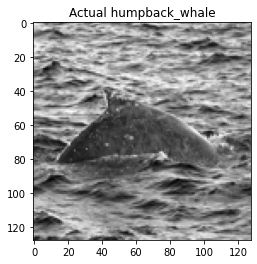

In [23]:
b = 16
plt.imshow(X_test_128[b].reshape(128, 128), cmap= 'gray')
plt.title("Actual " + species_test_128[b])
print("Random Forest Predicted: " + rf_pred_128[b])
print("KNN Predicted: " + knn_pred_128[b])
print("SVC Predicted: " + svc_pred_128[b])
print("Soft Voting Predicted: " + soft_vote_predict[b])
print("Hard Voting Predicted: " + hard_vote_predict[b])
print("Adaboost Predicted: " + adaPred_128[b])

Random Forest Predicted: beluga
KNN Predicted: beluga
SVC Predicted: beluga
Soft Voting Predicted: beluga
Hard Voting Predicted: beluga
Adaboost Predicted: beluga


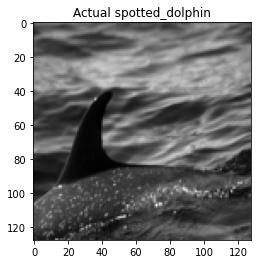

In [24]:
b = 5
plt.imshow(X_test_128[b].reshape(128, 128), cmap= 'gray')
plt.title("Actual " + species_test_128[b])
print("Random Forest Predicted: " + rf_pred_128[b])
print("KNN Predicted: " + knn_pred_128[b])
print("SVC Predicted: " + svc_pred_128[b])
print("Soft Voting Predicted: " + soft_vote_predict[b])
print("Hard Voting Predicted: " + hard_vote_predict[b])
print("Adaboost Predicted: " + adaPred_128[b])